In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('toyota_crap_data.csv')
display(df.head())


,Title,year,Price,condition,cylinders,drive,fuel,odometer,paint color,transmission,type
0,2010 TOYOTA CAMRY,2010.0,3200.0,NaN,NaN,NaN,gas,100000.0,silver,automatic,sedan
1,2010 TOYOTA CAMRY,2010.0,999.0,NaN,NaN,NaN,gas,80000.0,black,automatic,sedan
2,2021 TOYOTA COROLLA LE PRESTINE COND 65K MI 1 ...,2021.0,1.0,like new,4 cylinders,fwd,gas,65000.0,NaN,automatic,sedan
3,2011 Toyota Camry LE 4dr Sedan 6A,2011.0,5600.0,NaN,4 cylinders,fwd,gas,145425.0,white,automatic,sedan
4,Toyota Sienna Wheelchair,NaN,35000.0,excellent,6 cylinders,fwd,gas,69500.0,NaN,automatic,minivan


In [3]:
display(df.describe())


,year,Price,odometer
count,93.000000,94.000000,100.000000
mean,2011.580645,10055.340426,129082.620000
std,6.819605,9425.402134,69338.984757
min,1987.000000,1.000000,100.000000
25%,2008.000000,3999.000000,83233.500000
50%,2011.000000,7195.000000,124395.000000
75%,2017.000000,13296.250000,170250.000000
max,2023.000000,49900.000000,470000.000000


In [4]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         100 non-null    object 
 1   year          93 non-null     float64
 2   Price         94 non-null     float64
 3   condition     66 non-null     object 
 4   cylinders     70 non-null     object 
 5   drive         71 non-null     object 
 6   fuel          100 non-null    object 
 7   odometer      100 non-null    float64
 8   paint color   70 non-null     object 
 9   transmission  100 non-null    object 
 10  type          92 non-null     object 
dtypes: float64(3), object(8)
memory usage: 8.7+ KB


None

In [5]:
import pandas as pd
import re

# Toyota modelleri (gerektikçe eklenebilir)
toyota_models = [
    "Corolla",
    "Camry",
    "Yaris",
    "RAV4",
    "C-HR",
    "Hilux",
    "Land Cruiser",
    "Prius",
    "Avalon",
    "Highlander",
    "Tacoma",
    "Tundra",
    "Sienna"
]

def extract_model(title):
    if pd.isna(title):
        return None
    for model in toyota_models:
        pattern = r"\b" + re.escape(model) + r"\b"
        if re.search(pattern, title, re.IGNORECASE):
            return model
    return "Other"

# Yeni sütun oluştur
df["model"] = df["Title"].apply(extract_model)


In [6]:
display(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         100 non-null    object 
 1   year          93 non-null     float64
 2   Price         94 non-null     float64
 3   condition     66 non-null     object 
 4   cylinders     70 non-null     object 
 5   drive         71 non-null     object 
 6   fuel          100 non-null    object 
 7   odometer      100 non-null    float64
 8   paint color   70 non-null     object 
 9   transmission  100 non-null    object 
 10  type          92 non-null     object 
 11  model         100 non-null    object 
dtypes: float64(3), object(9)
memory usage: 9.5+ KB


None

# 1. Giriş ve Amaç
Proje Adı: İkinci El Araç Piyasa Analizi
Veri Kaynağı: Web scraping ile çekilen 100 ilan.
Amaç: Araç fiyatlarını etkileyen temel faktörleri (kilometre, yıl, vites vb.) belirlemek.

## 2. Kütüphanelerin Yüklenmesi

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px # İnteraktif grafikler için (Kaggle'da çok sevilir)
import warnings
warnings.filterwarnings('ignore')

# Grafik ayarları
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 3. Veriyi Yükleme ve İlk Bakış

In [9]:
# Veriyi oku (yukarıda yapıldı)


# İlk 5 satır
display(df.head())

# Veri seti özeti
print(df.info())

# Eksik değerlerin yüzdesini gör
missing_values = df.isnull().sum() / len(df) * 100
print(f"Eksik Değer Yüzdeleri:\n{missing_values}")

,Title,year,Price,condition,cylinders,drive,fuel,odometer,paint color,transmission,type,model
0,2010 TOYOTA CAMRY,2010.0,3200.0,NaN,NaN,NaN,gas,100000.0,silver,automatic,sedan,Camry
1,2010 TOYOTA CAMRY,2010.0,999.0,NaN,NaN,NaN,gas,80000.0,black,automatic,sedan,Camry
2,2021 TOYOTA COROLLA LE PRESTINE COND 65K MI 1 ...,2021.0,1.0,like new,4 cylinders,fwd,gas,65000.0,NaN,automatic,sedan,Corolla
3,2011 Toyota Camry LE 4dr Sedan 6A,2011.0,5600.0,NaN,4 cylinders,fwd,gas,145425.0,white,automatic,sedan,Camry
4,Toyota Sienna Wheelchair,NaN,35000.0,excellent,6 cylinders,fwd,gas,69500.0,NaN,automatic,minivan,Sienna


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         100 non-null    object 
 1   year          93 non-null     float64
 2   Price         94 non-null     float64
 3   condition     66 non-null     object 
 4   cylinders     70 non-null     object 
 5   drive         71 non-null     object 
 6   fuel          100 non-null    object 
 7   odometer      100 non-null    float64
 8   paint color   70 non-null     object 
 9   transmission  100 non-null    object 
 10  type          92 non-null     object 
 11  model         100 non-null    object 
dtypes: float64(3), object(9)
memory usage: 9.5+ KB
None
Eksik Değer Yüzdeleri:
Title            0.0
year             7.0
Price            6.0
condition       34.0
cylinders       30.0
drive           29.0
fuel             0.0
odometer         0.0
paint color     30.0
transmission     0.0
type

## 4. Veri Temizleme (Data Cleaning) - Kritik Bölüm

Veri setinde 100 satır olduğu için her satır kıymetli. Bu yüzden
Price: 6 tane eksik var. Fiyat hedef değişken olduğu için bunları dropna() ile silmek en sağlıklısıdır.
Year: Eksik olanları medyan (orta değer) ile doldurabiliriz.
Kategorik Sütunlar (Condition, Cylinders, Drive vb.): Çok fazla eksik var (%30+). Bunları "Unknown" (Bilinmiyor) olarak işaretleyerek veriyi koruyabiliriz.

In [10]:
# 1. Fiyatı olmayan satırları çıkar
df.dropna(subset=['Price'], inplace=True)

# 2. Yıl sütununu tam sayıya çevir ve eksikleri medyanla doldur
df['year'] = df['year'].fillna(df['year'].median()).astype(int)

# 3. Kategorik eksikleri "Unknown" ile doldur
cat_cols = ['condition', 'cylinders', 'drive', 'paint color', 'type']
for col in cat_cols:
    df[col] = df[col].fillna('Unknown')

# 4. Temizlenmiş veri kontrolü
print(df.isnull().sum())

Title           0
year            0
Price           0
condition       0
cylinders       0
drive           0
fuel            0
odometer        0
paint color     0
transmission    0
type            0
model           0
dtype: int64


## 5.Keşifsel Veri Analizi (EDA) (Visualizations)
Burada "Hangi faktör fiyatı nasıl etkiliyor?" sorusuna yanıt arayacağız.

A. Fiyat Dağılımı (Histogram)


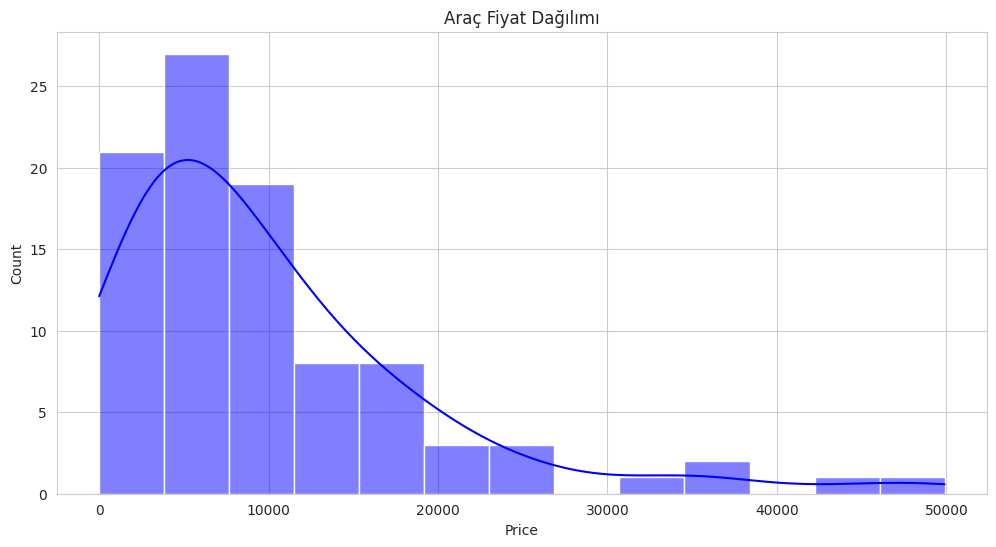

In [11]:
sns.histplot(df['Price'], kde=True, color='blue')
plt.title('Araç Fiyat Dağılımı')
plt.show()

B. Yıl vs Fiyat (Scatter Plot)

In [12]:
fig = px.scatter(df, x='year', y='Price', color='condition',
                 hover_data=['model', 'odometer'],
                 title="Araç Yaşına Göre Fiyat Değişimi")
fig.show()

C. Kilometre (Odometer) vs Fiyat


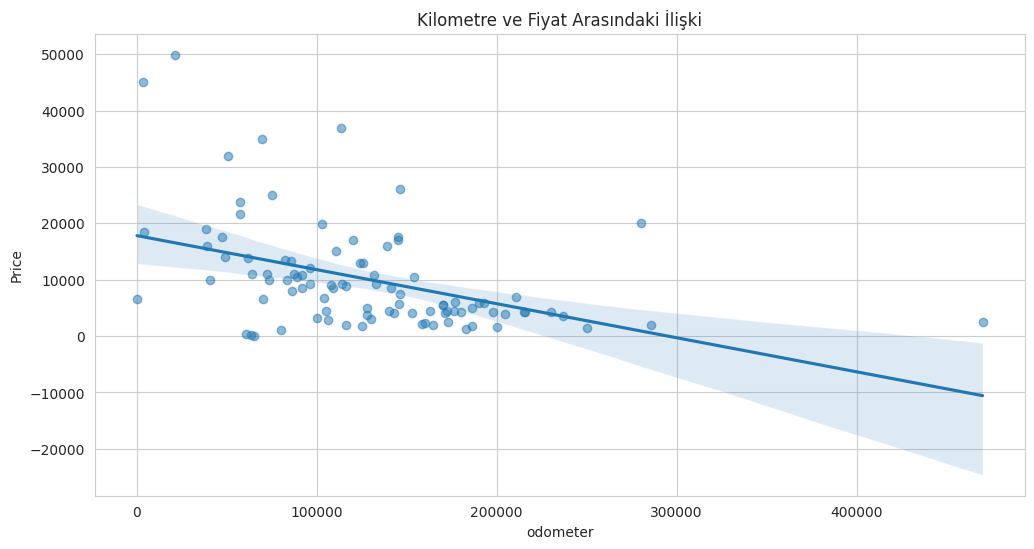

In [13]:
sns.regplot(data=df, x='odometer', y='Price', scatter_kws={'alpha':0.5})
plt.title('Kilometre ve Fiyat Arasındaki İlişki')
plt.show()

D. Araç Tiplerine Göre Ortalama Fiyat (Bar Plot)


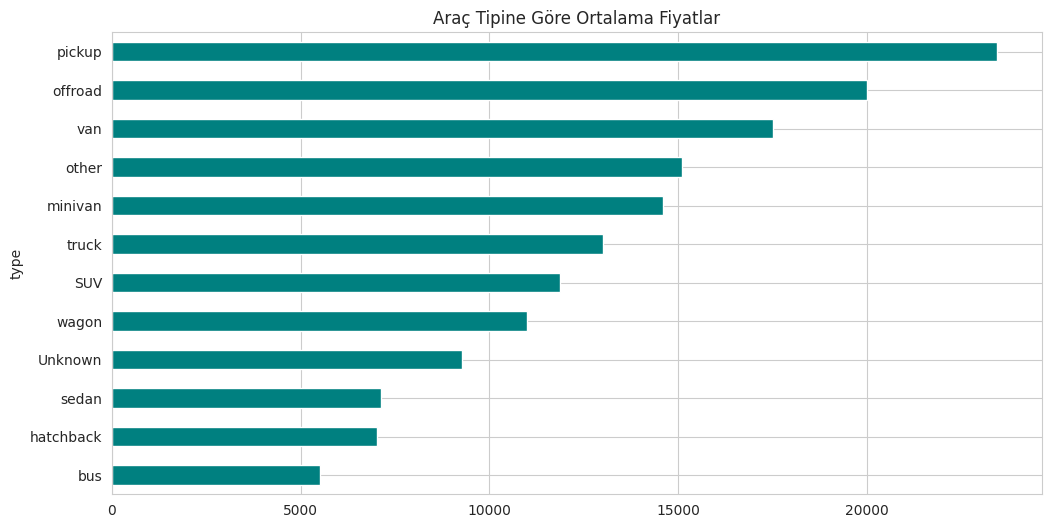

In [14]:
df.groupby('type')['Price'].mean().sort_values().plot(kind='barh', color='teal')
plt.title('Araç Tipine Göre Ortalama Fiyatlar')
plt.show()

6. Model ve Marka Analizi (Code & Markdown)
Title veya model sütunundan en çok hangi araçların ilanda olduğunu bulalım.

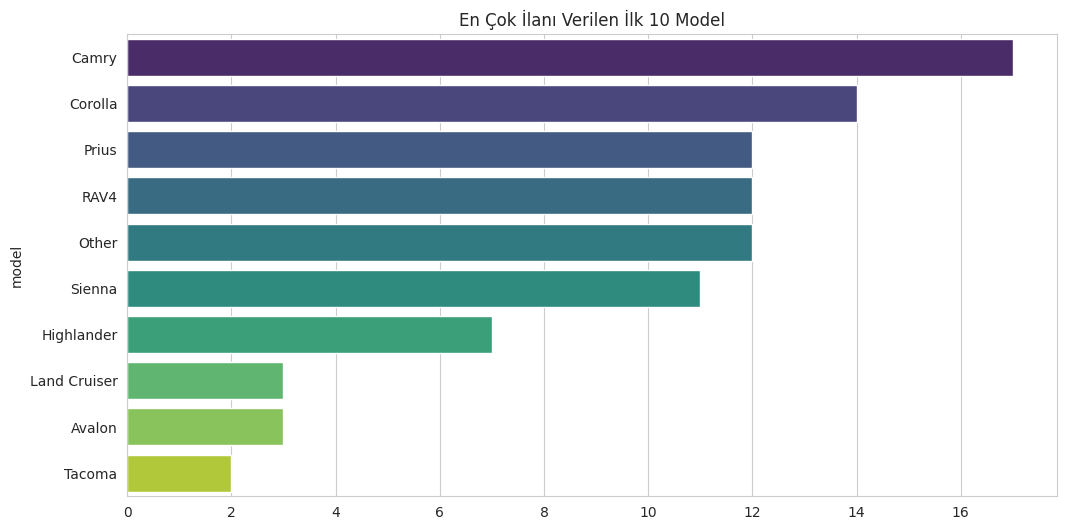

In [15]:
top_models = df['model'].value_counts().head(10)
sns.barplot(x=top_models.values, y=top_models.index, palette='viridis')
plt.title('En Çok İlanı Verilen İlk 10 Model')
plt.show()